In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Azkarehman/Mall-Customer-Segmentation-using-ML/master/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(f'There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in our dataset.')

There are 200 rows and 5 columns in our dataset.


In [4]:
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# We will doing the clustering based on the following columns and then analyze the customers lying in clusters

In [12]:
filtered_dataset = dataset[['Annual Income (k$)', "Spending Score (1-100)"]]
filtered_dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
# Doing clustering with 5 clusters
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=3425).fit(filtered_dataset)
filtered_dataset['Labels'] = kmeans_model.labels_

/tmp/ipykernel_90315/873316620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Labels'] = kmeans_model.labels_


In [15]:
filtered_dataset.head()

,Annual Income (k$),Spending Score (1-100),Labels
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3


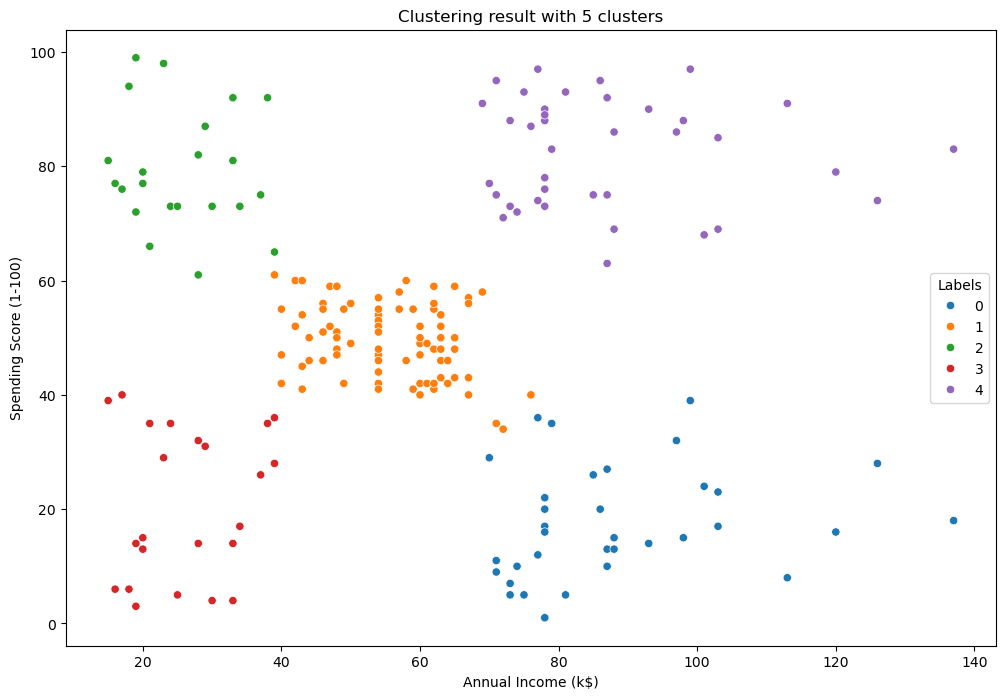

In [33]:
# Plotting the clusters on the Screen

plt.figure(figsize=(12,8))
sns.scatterplot(x=filtered_dataset['Annual Income (k$)'],
                y=filtered_dataset['Spending Score (1-100)'],
                hue=filtered_dataset['Labels'],
               palette=sns.color_palette("tab10",5))
plt.title("Clustering result with 5 clusters")
plt.show()